<a href="https://colab.research.google.com/github/MarcosCosta-Py/DSNP/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro_(M%C3%B3dulo2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando a Violência no Rio de Janeiro**

<img alt="Analisando Airbnb" width="100%" src="https://uploads.metropoles.com/wp-content/uploads/2018/02/28210832/viol%C3%AAncia-rio.jpg">

*by [Marcos Costa](https://www.linkedin.com/in/marcos-costa-4058b1167/)*

---


O Rio de Janeiro é considerado um dos principais pontos turísticos do Brasil por nele pertencer uma das sete maravilhas do mundo, o [Cristo Rendentor](https://www.todamateria.com.br/cristo-redentor/), além de praias exuberantes como a de Copacabana e Ipanema. Outro detalhe é a rica composição cultural e histórica que pode ser encontrada nos museus e teatros das cidades. 

Um lugar muito desejado pelos estrangeiros por suas belas paisagens naturais e encantadoras.

Apesar de tudo isso, o que mais aparece nos noticiários não são sobre as belezas do Rio, mas sim, sobre a violência que é praticada diariamente, assustando moradores e visitantes, além de causar  enormes prejuízos.

**Mas por que chegou a esse ponto?**

Como retratado anteriormente, a violência urbana no estado é assustadora e vem aumentando dia após dia. Os motivos são vários, mas o principal deles é o tráfico de drogas que funciona através de um sistema ilegal, gerando diversos conflitos com policiais e entre as próprias facções rivais, ocasionalmente tirando a vida de pessoas inocentes, como ocorreu no caso de [João Pedro](https://veja.abril.com.br/brasil/casa-onde-joao-pedro-foi-morto-tem-72-marcas-de-tiros-diz-entidade/), de 14 anos que foi morto no dia 18 de maio de 2020.

*by [Fonte](https://vestibular.uol.com.br/resumo-das-disciplinas/atualidades/violencia-no-rio-de-janeiro-desafio-do-estado-e-vencer-o-trafico.htm)*

## **Obtenção dos Dados**

Com a crescente violência, o governo do estado do Rio de Janeiro, disponibiliza através do site do [ISP](http://www.ispdados.rj.gov.br/estatistica.html) informações sobre grande parte dos crimes registrados, assim como um [dashboard](http://www.ispvisualizacao.rj.gov.br/index.html) interativo para melhor identificar violências por áreas de segurança pública.

* O arquivo que será utilizado no projeto tem informações sobre a violência no Rio de Janeiro do ano de 1991 à 2019 e pode ser acessado através desse [link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

## **Objetivo do estudo:**

Através da disposição dos dados, este projeto tem como objetivo realizar uma análise mais criteriosa dos crimes relacionados à homicidios, roubos e envolvimento com drogas. Além do mais, é de interesse verificar informações da recuperação de veículos e mortes de policiais em serviço.

Inicialmente vamos importar as bibliotecas necessárias tais como:

* Pandas: para a manipulação e análise dos dados
* Numpy: para operações matemáticas
* Seaborn e Matplotlib: para visualização dos dados através de gráficos altamente representativos

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Vamos carregar o arquivo que esta diponível através do link abaixo e salva-lo em um DataFrame pandas, que nos permite realizar melhores manipulações dos dados.

In [2]:
# carregar os dados
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## **Análise dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


Antes de iniciar qualquer análise, vamos verificar algumas entradas do nosso *dataset* e suas colunas.

In [3]:
# mostrar as 3 primeiras entradas do Dataset
df.head(3)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3


In [4]:
# mostrar as 3 últimas do Dataset
df.tail(3)

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Uma simples visualização das 3 linhas iniciais, que são referentes ao ano de 1991 nos mostra que há diversas colunas com valores faltantes, ou seja, nesse período possivelmente não houve ou não foi registrada a ocorrência de certo tipo de crime. Contudo, verificando as últimas 3 linhas referente ao ano de 2019 é possível ver uma frequência maior nessas colunas.

Como são dados retrospectivos (históricos) ordenados do mais antigo para o mais recente, também faz sentido ter perca de infomações nas primeiras linhas.

In [5]:
# ver as variáveis
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

### **Q1. Qual o tamanho do DataFrame e quais os tipos das variáveis ?**


In [6]:
# tamanho do DataFrame
print("O DataFrame possui {} entradas e {} variáveis.".format(df.shape[0],df.shape[1]))

O DataFrame possui 344 entradas e 56 variáveis.


In [7]:
# ver o tipo de cada variável e informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

 Como podemos verificar acima todas as variáveis são númericas, não há variáveis categóricas.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [8]:
# selecionar apenas as colunas com valores faltantes e suas respectivas porcentagens
comnan = []
for i in range(len(df.columns)):
  if df.isnull().sum()[i] != 0:
    comnan.append(df.isnull().sum().index[i])

print("Há {} variáveis com valores faltantes, sendo elas: \n".format(len(comnan)))
((df[comnan].isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

Há 30 variáveis com valores faltantes, sendo elas: 



roubo_bicicleta               80.232558
furto_bicicleta               80.232558
posse_drogas                  52.325581
cmba                          52.325581
cmp                           52.325581
aaapai                        52.325581
apf                           52.325581
apreensao_drogas_sem_autor    52.325581
trafico_drogas                52.325581
pol_civis_mortos_serv         41.860465
roubo_conducao_saque          41.860465
roubo_apos_saque              41.860465
furto_coletivo                41.860465
furto_celular                 41.860465
extorsao                      41.860465
sequestro_relampago           41.860465
estelionato                   41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
registro_ocorrencias          27.906977


Como podemos verificar acima, as variáveis relacionadas a roubo e furto bicicletas têm as maiores porcentagens de dados não preenchidos, cerca de *80.23%*, tendo em sequêcia, crimes relacionados a drogas, com *52.32%* de valores ausentes.

Dentre as variáveis com valores ausentes, há 3 de interesse para nosso estudo:
`trafico_drogas`, `pol_militares_mortos_serv` e `pol_civis_mortos_serv`, que serão utilizadas para análise a partir do período em que começam a ter valores preenchidos.

In [9]:
# Verificar a partir de qual período as variáveis não possuem mais valores ausentes
col_na = ['vano','trafico_drogas','pol_militares_mortos_serv','pol_civis_mortos_serv']
df[col_na].set_index('vano').isna().sum(level=0)

,trafico_drogas,pol_militares_mortos_serv,pol_civis_mortos_serv
vano,,,
1991,12.0,12.0,12.0
1992,12.0,12.0,12.0
1993,12.0,12.0,12.0
1994,12.0,12.0,12.0
1995,12.0,12.0,12.0
1996,12.0,12.0,12.0
1997,12.0,12.0,12.0
1998,12.0,12.0,12.0
1999,12.0,12.0,12.0


Como podemos verificar de acordo com a tabela acima, a coluna `trafico_drogas` não tem valores faltantes a partir de 2006 e `pol_militares_mortos_serv` e `pol_civis_mortos_serv` a partir de 2003.

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das features, irei plotar histogramas, pois trata-se apenas de variáveis numéricas.

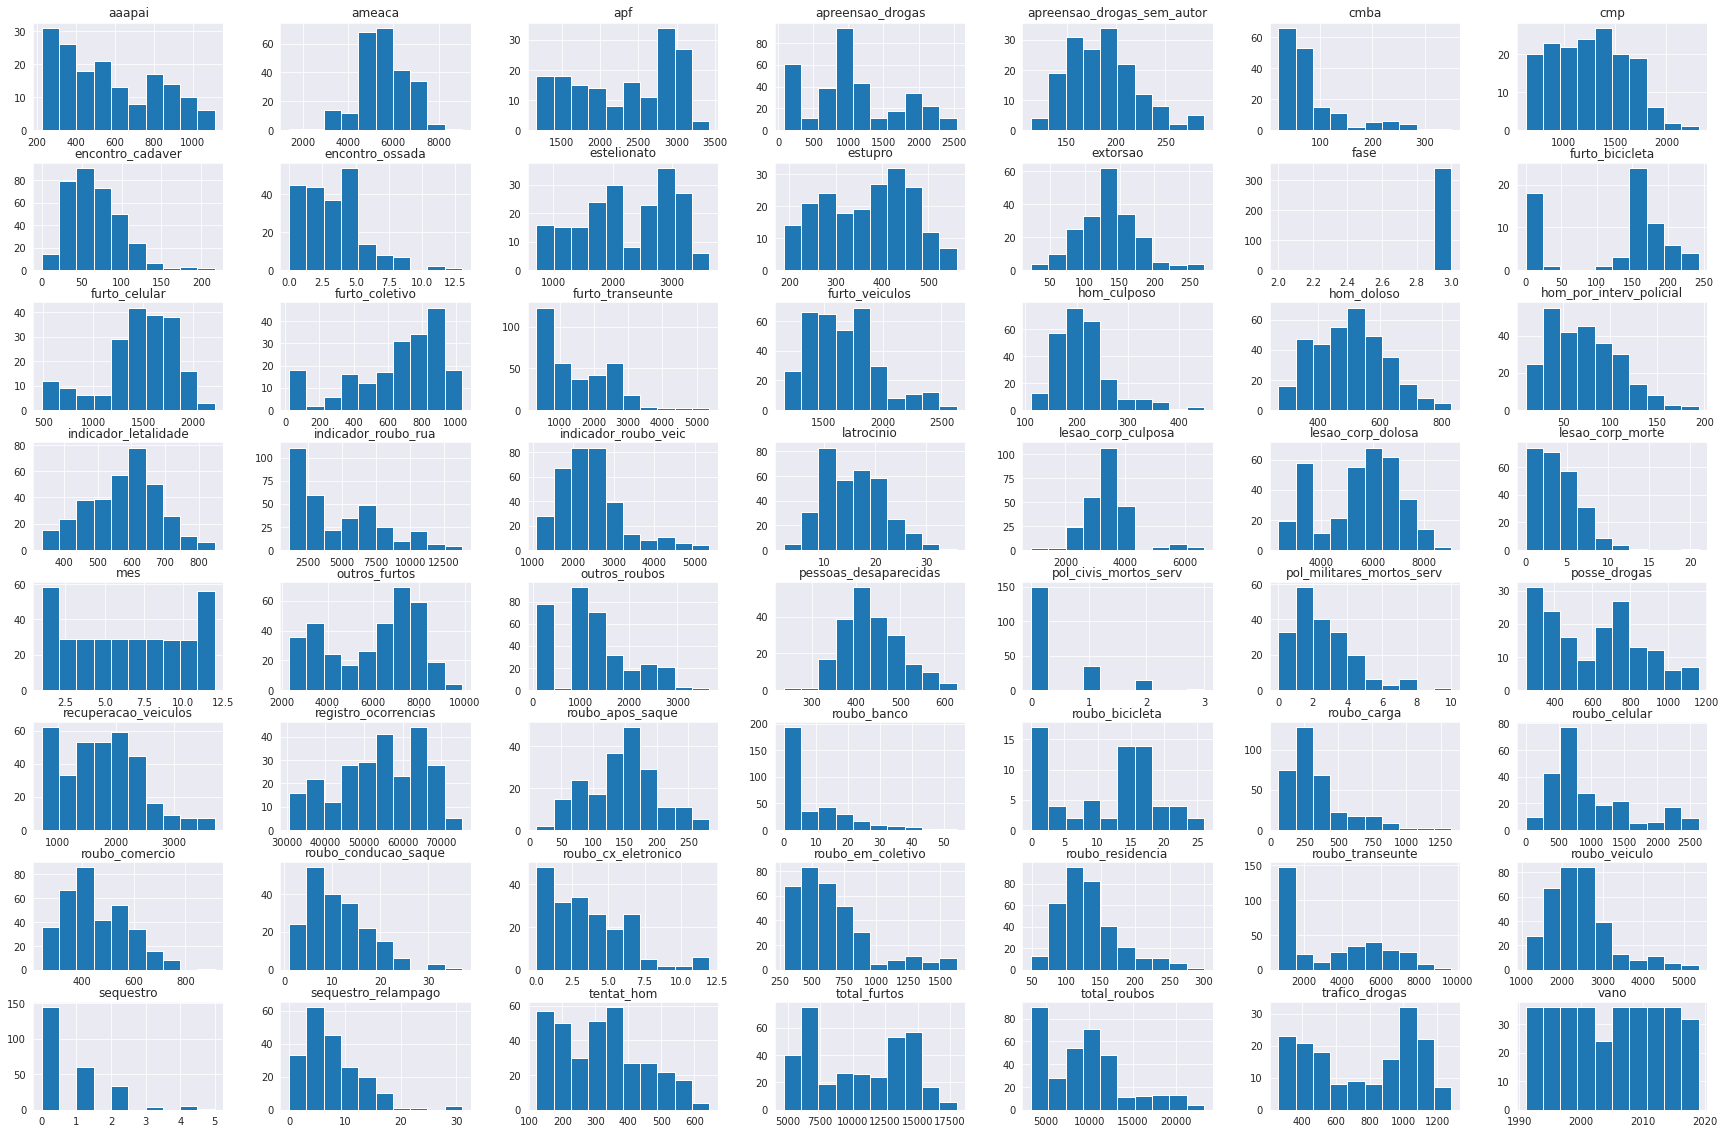

In [10]:
# histograma para cada variável do ano de 1991 à 2019
sns.set_style('darkgrid')
df.hist(figsize=(30,20));

Com base nos histogramas acima, podemos encontrar diversos padrões das variáveis, os intervalos com maiores frequências e suspeitar da presença de outliers em grande parte delas.

### Aqui, iremos arrumar o nome para a variável ano

In [11]:
# alterando o nome da coluna `vano` para `ano`
df.rename(columns={'vano':'ano'}, inplace=True)

## **Informações Estatísticas da Violência no Rio de Janeiro**

Através do comando `describe()` podemos analisar um resumo estatístico das variáveis que nos permite extrair diversar informações importantes e a possível identificação de outliers.



In [12]:
# resumo estatístico das variáveis numéricas
df.iloc[:,2:55].describe()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias
count,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000
mean,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290
std,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992
min,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000
25%,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000
50%,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000,285.500000,2788.500000,592.000000,4.500000,3.000000,717.500000,10.000000,149.500000,13.000000,1154.000000,9243.500000,1637.500000,1076.500000,717.500000,1492.500000,158.000000,6559.000

Com base na tabela acima, podemos identificar a quantidade de valores preenchidos em cada variável, como por exemplo `hom_doloso` que há 344 entradas, enquanto `hom_por_interv_policial` tem 260.
Outro detalhe que podemos identificar com precisão é a presença de valores fora do padrão, como no caso da variável `roubo_carga`, que possui uma mediana de *285.50* enquanto o média vale *340.32*, pois a segunda medida é mais sensível a esses valores extremos, podendo ser identicado também, quando se compara valores que estão abaixo de 75% dos dados *(401.25)* com o valor máximo *(1329)*.

### **Analisando informações sobre *Veículos:***

Como o *dataset* disponibiliza informações de roubo, furto e recuperação de veículos, nesta etapa do projeto, investigaremos sobre esse impasse na realidade das pessoas. 

### **Q4. Encontre as médias das seguintes variáveis:**
*  `roubo_veiculo`
* `furto_veiculo`
* `recuperacao_vaiculos`

In [13]:
# média da variável roubo_veiculo
round(df.roubo_veiculo.mean(),0)

2449.0

Acima, temos uma média de aproximadamente 2449 roubos de veículos por mês.

In [14]:
# média da variável furto_veiculos
round(df.furto_veiculos.mean(),0)

1675.0

Com respeito aos furtos de veículos por mês, temos uma média um pouco menor em relação aos roubos, com cerca de 1675 furtos.

In [15]:
# média da variável recuperacao_veiculos
round(df.recuperacao_veiculos.mean(),0)

1772.0

A média de veículos recuperados por mês é de aproximadamente 1772.

### **Q5. Qual a porcentagem de carros recuperados dentre os carros roubados mais os carros furtados?**

In [16]:
# quantidade de carros roubados 
print("Total de veículos roubados de 1991 à 2019 {:.2f} ".format(df.roubo_veiculo.sum()))

# quantidade de carros furtados
print("Total de veículos furtados de 1991 à 2019 {:.2f} ".format(df.furto_veiculos.sum()))

# quantidade de veículos recuperados
print("Total de veículos recuperados de 1991 à 2019 {:.2f} \n".format(df.recuperacao_veiculos.sum()))

# porcentagem dos carros recuperados dentre os roubados + furtados
print("{:.2f}% dos veículos roubados ou furtados são recuperados.".format(round((df.recuperacao_veiculos.sum()/(df.roubo_veiculo.sum()+df.furto_veiculos.sum()))* 100,0)))

Total de veículos roubados de 1991 à 2019 842352.00 
Total de veículos furtados de 1991 à 2019 576087.00 
Total de veículos recuperados de 1991 à 2019 609650.00 

43.00% dos veículos roubados ou furtados são recuperados.


### **Analisando informações de *Crimes Contra a Vida***

### **Q6. Qual foi o menor índice de homicídio doloso? E qual foi o maior?**

In [17]:
# identificando a menor quantidade de homicídio doloso e o período
print("A menor quantidade de homicídio doloso foi {} no mês {} de {}.".format(df.hom_doloso.min(),df[df['hom_doloso']==df.hom_doloso.min()]['mes'].values[0],df[df['hom_doloso']==df.hom_doloso.min()]['ano'].values[0]))

A menor quantidade de homicídio doloso foi 272 no mês 6 de 2015.


In [18]:
# identificando a maior quantidade de homicídio doloso e o período
print("A maior quantidade de homicídios doloso foi {} no mês {} de {}.".format(df.hom_doloso.max(),df[df['hom_doloso']==df.hom_doloso.max()]['mes'].values[0],df[df['hom_doloso']==df.hom_doloso.max()]['ano'].values[0]))

A maior quantidade de homicídios doloso foi 831 no mês 1 de 1995.


Nessa etapa iremos criar uma nova variável que é a quantidade total de policiais mortos em serviço, que será contabilizada a partir do ano de 2003 e referencia-se a soma de duas variáveis já existentes no *dataset*

In [19]:
# criar a nova variável e adiciona-la a um DataFrame especifico referente a morte de policiais em serviço
df_pol = df[['pol_militares_mortos_serv','pol_civis_mortos_serv']]
total_pol_mortos_serv = []
df_pol.dropna(inplace=True)
for i in range(len(df_pol.pol_militares_mortos_serv)):
  total_pol_mortos_serv.append(df_pol.pol_militares_mortos_serv.values[i]+df_pol.pol_civis_mortos_serv.values[i])

df_pol['total_pol_mortos_serv'] = total_pol_mortos_serv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# Verificar a quantidade de policiais mortos em serviço
df_pol.sum()

pol_militares_mortos_serv    417.0
pol_civis_mortos_serv         68.0
total_pol_mortos_serv        485.0
dtype: float64

Como apresentado acima, vemos a quantidade de policiais mortos em serviço do ano de 2003 à 2019 no estado do Rio de Janeiro. 

Podemos verificar também que a quantidade de morte dos policiais militares são maiores do que as mortes de policiais civis, visto que a primeira classe de segurança tem como princípio fazer o policiamento ostensivo e preservar a ordem pública, enquanto a segunda classe, tem como função investigar todos os crimes que aconteçam no estado.

## **Visualização de Dados**

Para melhor entender como estão distribuídos os dados e identificar possíveis outliers, é de suma importância plotar gráficos altamente representativos para as variáveis.

A seguir, através de um histograma detalhado, iremos analisar esses pontos para à variável `hom_doloso`.

Média de homicídio doloso: 505


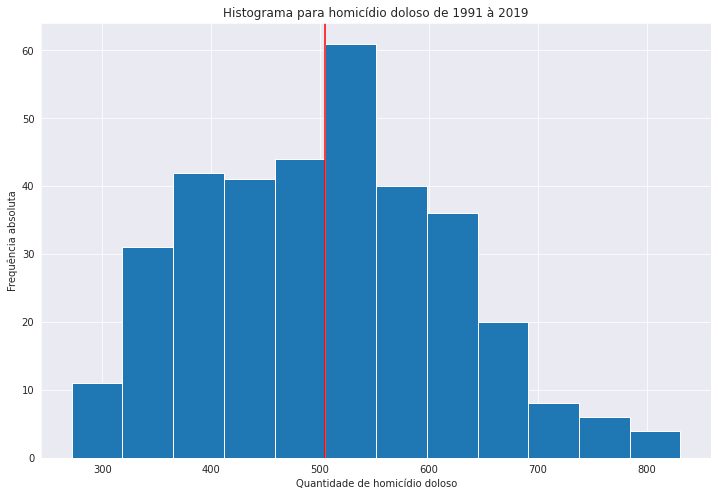

In [21]:
print("Média de homicídio doloso: {}".format(round(df.hom_doloso.mean()),0))
df.hom_doloso.hist(figsize=(12,8), bins=12)
plt.axvline(df.hom_doloso.mean(), label="Média", c='red')
plt.title("Histograma para homicídio doloso de 1991 à 2019", fontsize=12)
plt.xlabel("Quantidade de homicídio doloso")
plt.ylabel("Frequência absoluta");

O gráfico acima nos mostra que a maior concetração de homicídios dolosos está entre 500 e 550 ao longo dos anos, com um média de 505 por mês, sendo representada pela linha vermelha.

Utilizando um gráfico de linha, iremos analisar a frequência dos valores de `roubo_em_coletivo` ao longo dos anos de 1991 à 2019.

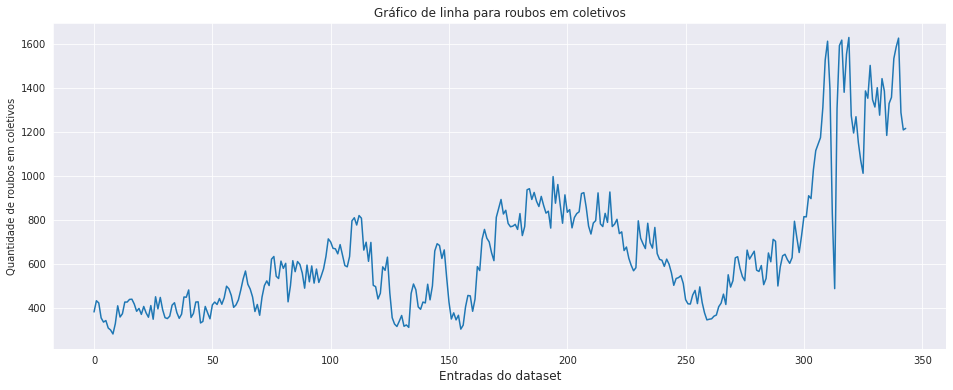

In [22]:
# plotar gráfico de linha para roubo_em_coletivo
df.roubo_em_coletivo.plot(figsize=(16,6))
plt.title("Gráfico de linha para roubos em coletivos", fontsize=12)
plt.xlabel('Entradas do dataset', fontsize=12)
plt.ylabel('Quantidade de roubos em coletivos');

O gráfico de linha acima, apresenta os valores de roubo em coletivo para cada entrada do dataset, ou seja, o inicio da linha se refere-se ao mês de janeiro de 1991 com valor de *381* e o final da linha representa o mês agosto de 2019 com um valor de *1215*, com isso percebemos o aumento desse crime.




Agora iremos separar algumas colunas de interesse para a criação de box-plots.

In [23]:
# colunas de interesse para uma representação gráfica sem distorções
box = ['roubo_veiculo','roubo_em_coletivo','furto_veiculos','recuperacao_veiculos']

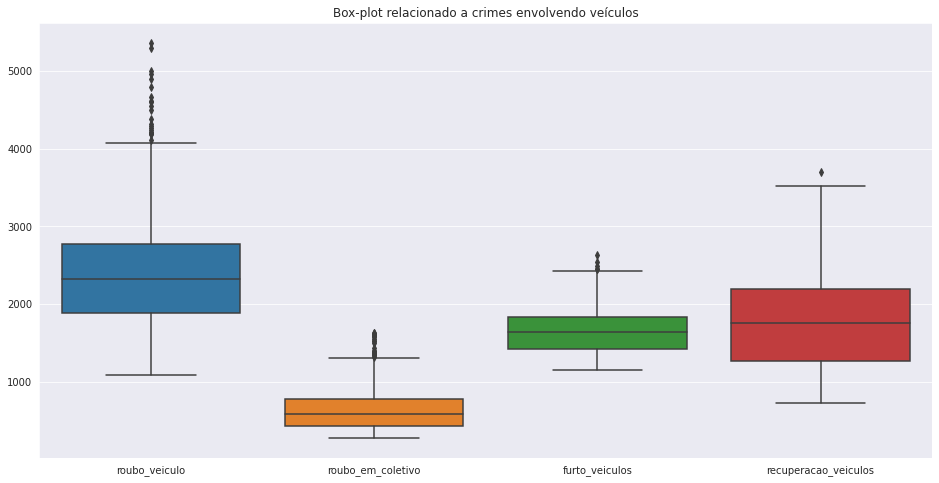

In [24]:
# plotar os box-plots
plt.figure(figsize=(16,8))
sns.boxplot(data=df[box])
plt.title("Box-plot relacionado a crimes envolvendo veículos");

Os box-plots acima são referentes a crimes relacionados a veículos e a recuperação de parte deles, do ano de 1991 à 2019.

* O primeiro nos indica que a concentração principal de roubo de veículos está entre 1900 e 2700 e há presença de vários outliers.
* O segundo, referente a roubo em coletivo possui uma concentração inferior, dentro do intervalo de 600 a 700, com diversos outliers também.
* O terceiro que é referente a furto de veículos, possui centralidade dos dados entre 1500 e 1800, com vários outliers.
* O último box-plot, possui os 50% dos dados centrais mais distribuidos, entre 1300 e 2200, possuindo apenas um valor fora do padrão.

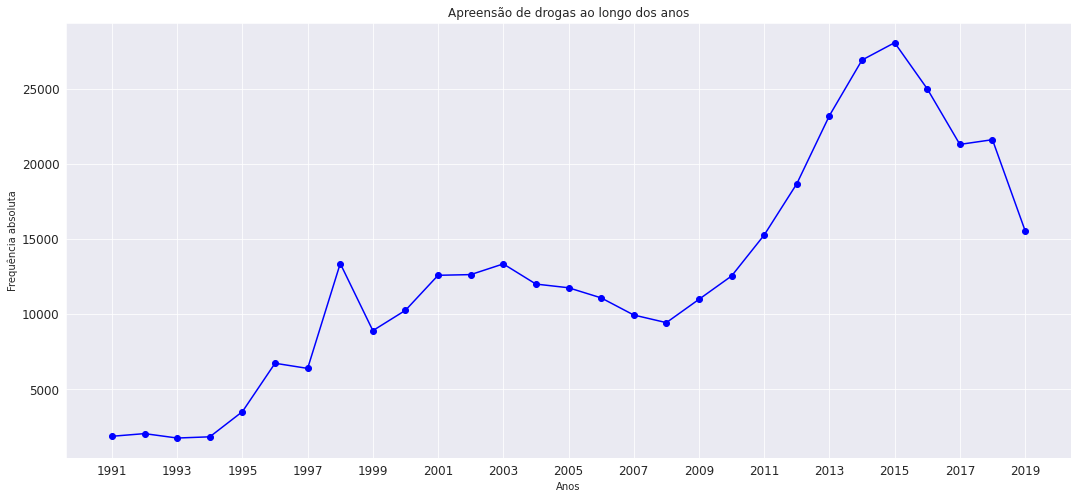

In [25]:
# Gráfico de linha para apreensão de drogas
year = df.groupby('ano').apreensao_drogas.sum().keys()
year_sum = df.groupby('ano').apreensao_drogas.sum().values
plt.figure(figsize=(18,8))
plt.title("Apreensão de drogas ao longo dos anos", fontsize=12)
plt.xlabel("Anos")
plt.ylabel("Frequência absoluta")
plt.xticks(range(1991,2020,2), fontsize=12)
plt.yticks(fontsize=12)
plt.plot(year,year_sum, marker='o', color='blue');

Como podemos observar, o índice de apreensão de drogas manteve-se nivelado entre os anos de 1991 à 1994, a partir dai, os valores aumentaram constantemente, sendo que a maior quantidade de apreensão de drogas foi aproximadamente 29.000 no ano 2015.

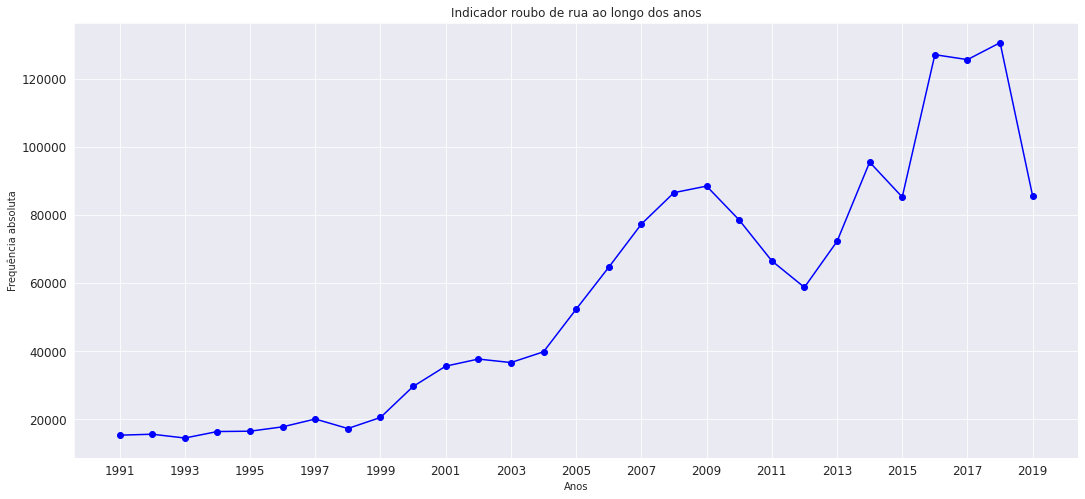

In [26]:
# Gráfico de linha para indicador roubo de rua
year = df.groupby('ano').indicador_roubo_rua.sum().keys()
year_sum = df.groupby('ano').indicador_roubo_rua.sum().values
plt.figure(figsize=(18,8))
plt.title("Indicador roubo de rua ao longo dos anos", fontsize=12)
plt.xlabel("Anos")
plt.ylabel("Frequência absoluta")
plt.xticks(range(1991,2020,2), fontsize=12)
plt.yticks(fontsize=12)
plt.plot(year,year_sum, marker='o', color='blue');

O indicador roubo de rua é composto pelos títulos roubo a transeunte, roubo de aparelho celular e roubo em coletivo.

E com base no gráfico acima, tal indicador manteve-se constante entre os anos de 1991 à 1999, a partir do ano 2000 houve um crescimento significativo em relação a esse fato. Tendo como maior destaque, o ano de 2018, acumulando 135.000 indicadores desses roubos.

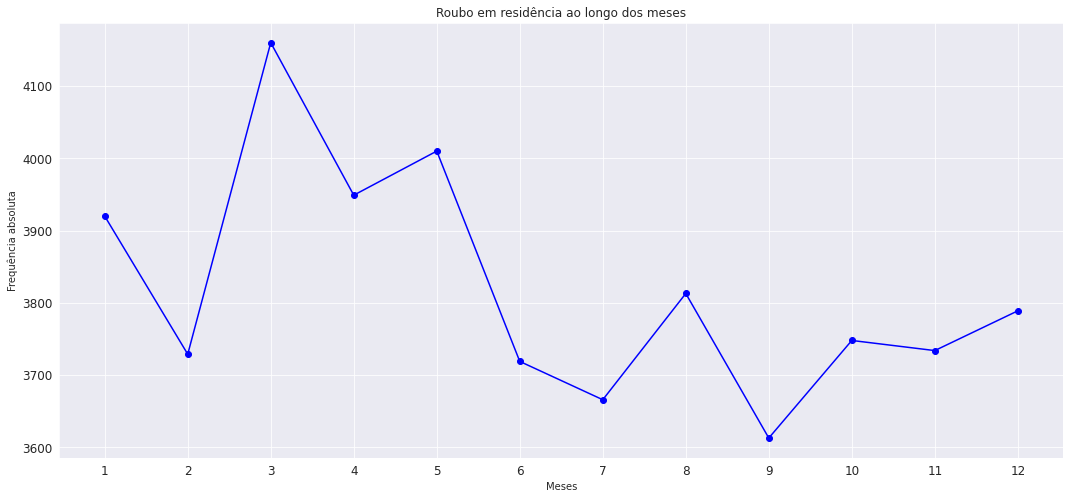

In [27]:
# analisar a distribuição de roubos em residência por mês, verificando se há influências no período de férias
month = df.groupby('mes').roubo_residencia.sum().keys()
month_sum = df.groupby('mes').roubo_residencia.sum().values
plt.figure(figsize=(18,8))
plt.title("Roubo em residência ao longo dos meses",fontsize=12)
plt.xlabel("Meses")
plt.ylabel("Frequência absoluta")
plt.xticks(range(1,13,1), fontsize=12)
plt.yticks(fontsize=12)
plt.plot(month,month_sum, marker='o', color='blue');

A intenção de ter elaborado esse gráfico, era verificar se no principal período de férias (Dezembro, janeiro e julho), teria um aumento no índice de roubo a residência.

Com isso, evidencia-se que o mês de janeiro tem um valor intermediário com base na distribuição dos valores gerais, havendo uma maior intensidade de roubo a residência no mês de março, talvez por conta do feriado de carnaval, cuja várias famílias viajam. A partir do mês de junho, os índices desse roubo diminuem, comparado ao primeiro semestre do ano.

Abaixo, selecionaremos algumas colunas de interesse para plotar gráficos e desenvolver uma análise completa.

In [28]:
# colunas de interesse
colunas = ['ano','mes','roubo_veiculo','furto_veiculos','apreensao_drogas','trafico_drogas','recuperacao_veiculos']

# o comando abaixo faz a soma de cada coluna agrupando por ano e substitui os NaN por 0.
new_df = df[colunas].drop('mes',axis=1).set_index('ano').stack().sum(level=[0,1]).unstack().fillna(0)
new_df.head(1)

,roubo_veiculo,furto_veiculos,apreensao_drogas,trafico_drogas,recuperacao_veiculos
ano,,,,,
1991,16452.0,23979.0,1866.0,0.0,9890.0


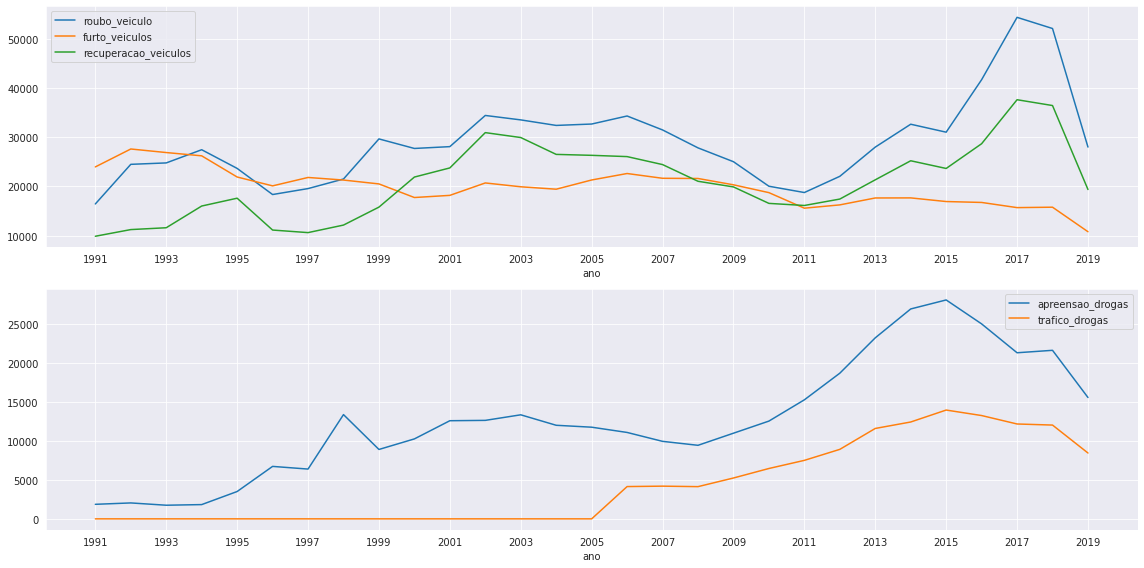

In [29]:
# plotar gráficos relacionados a veículos e crimes de drogas
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
va_int1 = ['roubo_veiculo','furto_veiculos','recuperacao_veiculos']
va_int2 = ['apreensao_drogas','trafico_drogas']

new_df[va_int1].plot(ax=ax1)
ax1.set_xticks(range(1991,2020,2))

new_df[va_int2].plot(ax=ax2)
ax2.set_xticks(range(1991,2020,2));

plt.tight_layout()

Analisando o primeiro gráfico acima, temos uma distribuição semelhante entre roubos e recuperação de veículos, porém a primeria informação mantem-se sempre superior a segunda, ou seja, sempre há maiores percas.
Em relaçao ao período de 1999 à 2008 e de 2011 à 2019, temos que os índices de recuperação de veículos foram superiores aos furtos.

Já o segundo gráfico, evidência um crescente índice de *apreensão de drogas* do ano de 1991 à 2019. Com relação ao *tráfico de drogas* no período de 1991 à 2005, trata-se de valores ausentes do dataset que foram substituidos por 0, mas a partir de 2006, temos a informação de que o *tráfico de drogas* aumentou, só não ultrapassando os valores de *apreensão de drogas* .

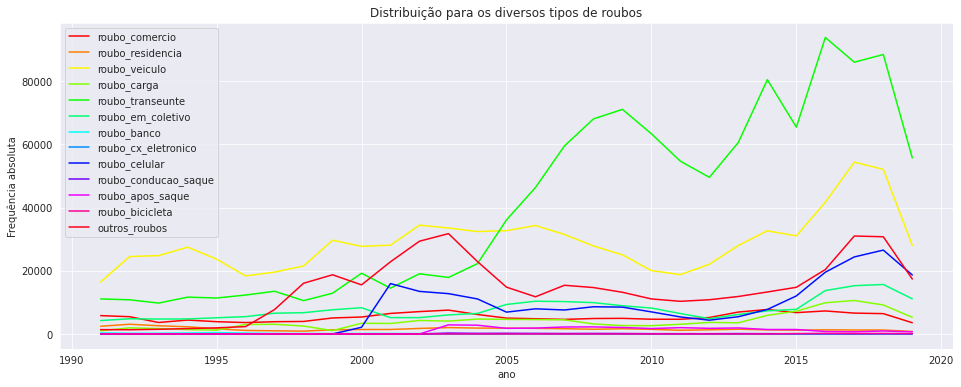

In [30]:
# plotar gráfico de linhas para os diversos tipos de roubos
roubos = ['ano','mes','roubo_comercio','roubo_residencia','roubo_veiculo','roubo_carga','roubo_transeunte','roubo_em_coletivo','roubo_banco','roubo_cx_eletronico','roubo_celular','roubo_conducao_saque','roubo_apos_saque','roubo_bicicleta','outros_roubos']
df_roubos = df[roubos].drop('mes',axis=1).set_index('ano').stack().sum(level=[0,1]).unstack().fillna(0)
df_roubos.plot(figsize=(16,6), colormap='hsv')
plt.title("Distribuição para os diversos tipos de roubos", fontsize=12)
plt.ylabel("Frequência absoluta");

Analisando os diversos tipos de roubos presente na bases de dados, podemos destacar que no Rio de Janeiro, a maior ocorrência se dá pelo *roubo transeunte* (caracterizado por assalto a indivíduos que são abordados enquanto transitam em vias públicas com subtração de pertences de forma violenta).
Na sequência temos *roubo de veículos* com alto índice de ocorrência. O que de fato são, os mais caracterizados em notícias de jornais.

### **Vale ressaltar que os valores dispostos para o ano de 2019 tem sempre uma queda em relação à 2018, pois no último ano da base de dados, temos informações referentes à 8 meses apenas, diferentemente dos demais anos que possuem dados dos 12 meses do ano.**

## **Conclusões**

Inicialmente foram verificadas algumas entradas do DataFrame, assim como a dimensão e também as colunas, para se ter uma familiarização da estrutura dos dados.

Em seguida, foi realizada uma análise descritiva e explorátoria completa do *dataset* para extração de insights sobre a *violência no estado do Rio de Janeiro*, obtendo os seguintes resultados, que podem ser divididos em duas etapas:

* Etapa técnica:
  
  * Verificou-se que todas as variáveis são do tipo numérica e dentre as 56 dispostas, 30 delas possuem altas porcentagens de valores ausentes, tendo maior destaque aquelas referentes a roubo de bicicletas e crimes relacionado a drogas.
  * Como tratamento dos valores faltantes para algumas features de interesse, utilizamos apenas o período com valores preenchidos, descartando as informações ausentes. 
  * Através dos histogramas para verificar a distribuição das variáveis e o resumo estatístico, identificamos a presença de outliers na grande maioria delas e os intervalos com maiores frequências de valores.

* Etapa contextualizada:

  * Com relação a *crimes envolvendo veículos*, temos uma média de 2449 roubos por mês, 1675 furtos e 1772 recuperações, ou seja, somando as percas para o crime, o índice de recuperação de veículos é muito baixo, cerca de 43% apenas.

  * Relatando sobre *homicídio doloso*, o menor índice foi 272 e ocorreu no mês 6 de 2015, já o maior foi de 831 no mês 1 de 1995. Contudo, temos que o intervalo com a quantidade mais frequênte desse crime, ocorre entre 500 e 550 homicídios dolosos registrados mensalmente.

  * Obtivemos que a quantidade de morte dos policiais militares *(417)* são maiores do que as mortes de policiais civis *(68)*, visto que a primeira classe de segurança tem como princípio fazer o policiamento ostensivo e preservar a ordem pública, enquanto a segunda classe, tem como função investigar todos os crimes que aconteçam no estado.

  * *Roubo em coletivo* apresenta uma distribuição crescente ao longo dos anos, visto que em janeiro de 1991 tinhamos um registro de 381 ocorrências, enquanto em agosto de 2019 temos 1215.

  * Em relação ao índice de *apreensão de drogas*, observamos que manteve-se nivelado entre os anos de 1991 à 1994, a partir dai, os valores aumentaram constantemente, sendo que a maior quantidade de *apreensão de drogas* foi aproximadamente 29.000 no ano 2015.

  * Evidenciando sobre o *indicador roubo de rua*, que é composto pelos títulos roubo a transeunte, roubo de aparelho celular e roubo em coletivo, temos que tal indicador manteve-se constante entre os anos de 1991 à 1999, a partir do ano 2000 houve um crescimento significativo em relação a esse fato. Tendo como maior destaque, o ano de 2018, acumulando 135.000 indicadores desses roubos.

  * Foi de interesse investigar se no principal período de férias (Dezembro, janeiro e julho), teria um aumento de *roubo a residência*, e obtivemos como resultado que o mês de janeiro tem um valor intermediário com base na distribuição dos valores gerais, havendo uma maior intensidade desse crime no mês de março, talvez por conta do feriado de carnaval, cuja várias famílias viajam. A partir do mês de junho, os índices de *roubo a residência* diminuem, comparado ao primeiro semestre do ano.
  
  * Por fim, tivemos que o tipo de roubo mais cometido no Rio de Janeiro, é *roubo transeunte* (caracterizado por assalto a indivíduos que são abordados enquanto transitam em vias públicas com subtração de pertences de forma violenta). E na sequência temos *roubo de veículos* com alto índice de ocorrência. O que de fato são, os mais caracterizados em notícias de jornais.


Para saber mais infomações sobre Data Science e divulgação de projetos, me acompanhem no [linkedIn](https://www.linkedin.com/in/marcos-costa-4058b1167/) e sigam meu blog no [medium](https://medium.com/@marcoscosta1475).